In [1]:
from math import *
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

import sys
import os
# 获取project目录
def get_current_file_dir():
    # 判断是否在 Jupyter Notebook 环境
    try:
        shell = get_ipython().__class__.__name__  # ← 误报，不用管
        if shell == 'ZMQInteractiveShell':  # Jupyter Notebook 或 JupyterLab
            # 推荐用 os.getcwd()，指向启动 Jupyter 的目录
            return os.getcwd()
        else:  # 其他 shell
            return os.path.dirname(os.path.abspath(__file__))
    except NameError:
        # 普通 Python 脚本
        return os.path.dirname(os.path.abspath(__file__))


current_dir = get_current_file_dir()
sys.path.append(os.path.dirname(os.path.dirname(current_dir)))

theta_list = np.linspace(-pi/2, pi/2,  36, endpoint=True)


def one_in_alpha(theta1, theta2, delta_psi, alpha_threshold):
    point_ = np.array([cos(theta1), sin(theta1), 0])
    L_ = np.array([cos(theta2)*cos(delta_psi), sin(theta2), cos(theta2)*sin(delta_psi)])
    cos_alpha = np.dot(point_, L_)
    if cos_alpha >= cos(alpha_threshold):
        in_alpha = True
    else:
        in_alpha = False
    return in_alpha

def in_or_out_alpha(theta, alpha_threshold):
    delta_psi_list = np.linspace(-pi, pi, 37, endpoint=True)
    theta2_list = np.linspace(-pi/2, pi/2, 19, endpoint=True)

    dots_list_in = []
    dots_list_out = []
    dots_list = []
    for delta_psi in delta_psi_list:
        for theta2 in theta2_list:
            dot_in_alpha = one_in_alpha(theta, theta2, delta_psi, alpha_threshold)
            if dot_in_alpha:
                dots_list_in.append(np.array([theta, theta2, delta_psi]))
                dots_list.append(np.array([theta, theta2, delta_psi, 1]))
            else:
                dots_list_out.append(np.array([theta, theta2, delta_psi]))
                dots_list.append(np.array([theta, theta2, delta_psi, 0]))

    return dots_list_in, dots_list_out, dots_list


alpha_threshold = pi/3
Dots_list_1_in, Dots_list_1_out, Dots1 = in_or_out_alpha(0, alpha_threshold)

# Dots_list_2_in, Dots_list_2_out, Dots2 = in_or_out_alpha(0.8, alpha_threshold)

# Dots_list_3_in, Dots_list_3_out, Dots3 = in_or_out_alpha(1.56, alpha_threshold)

print(np.array(Dots1))




[[ 0.         -1.57079633 -3.14159265  0.        ]
 [ 0.         -1.3962634  -3.14159265  0.        ]
 [ 0.         -1.22173048 -3.14159265  0.        ]
 ...
 [ 0.          1.22173048  3.14159265  0.        ]
 [ 0.          1.3962634   3.14159265  0.        ]
 [ 0.          1.57079633  3.14159265  0.        ]]


Processing Dataset 1 (theta1 = 0):
Dataset theta1=0 - Accuracy: 0.9973


C:\Users\LYH\AppData\Local\Temp\ipykernel_2556\912211306.py:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_array[:, 1][data_array[:, 3] == 0], data_array[:, 2][data_array[:, 3] == 0],


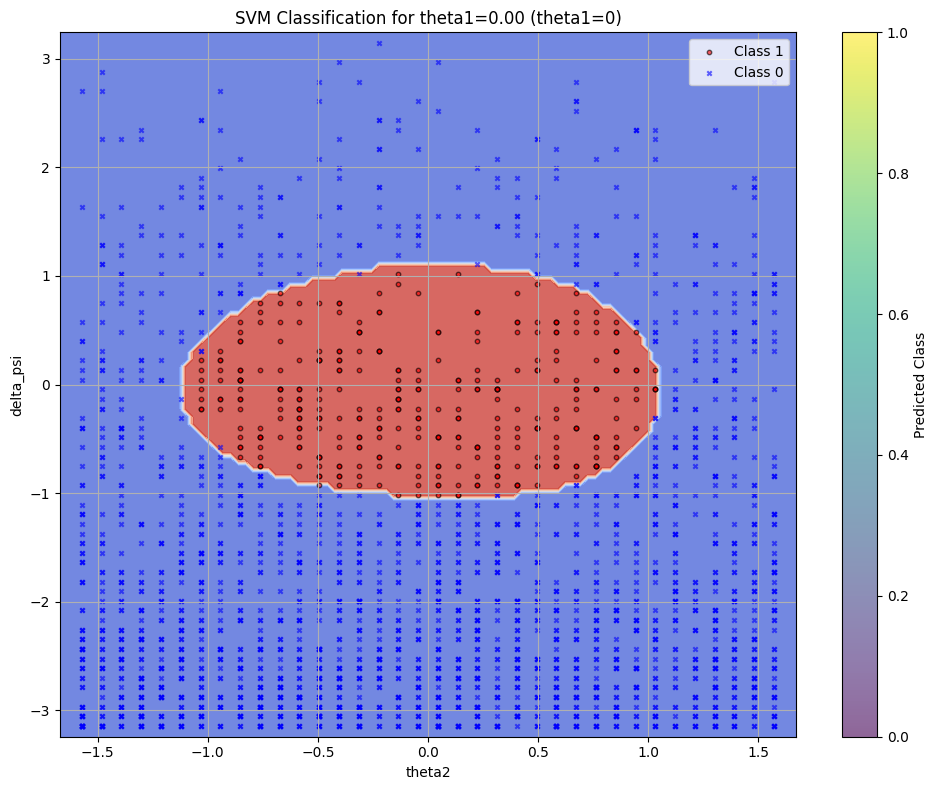


Processing Dataset 2 (theta1 = 0.8):
Dataset theta1=0.8 - Accuracy: 0.9969


C:\Users\LYH\AppData\Local\Temp\ipykernel_2556\912211306.py:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_array[:, 1][data_array[:, 3] == 0], data_array[:, 2][data_array[:, 3] == 0],


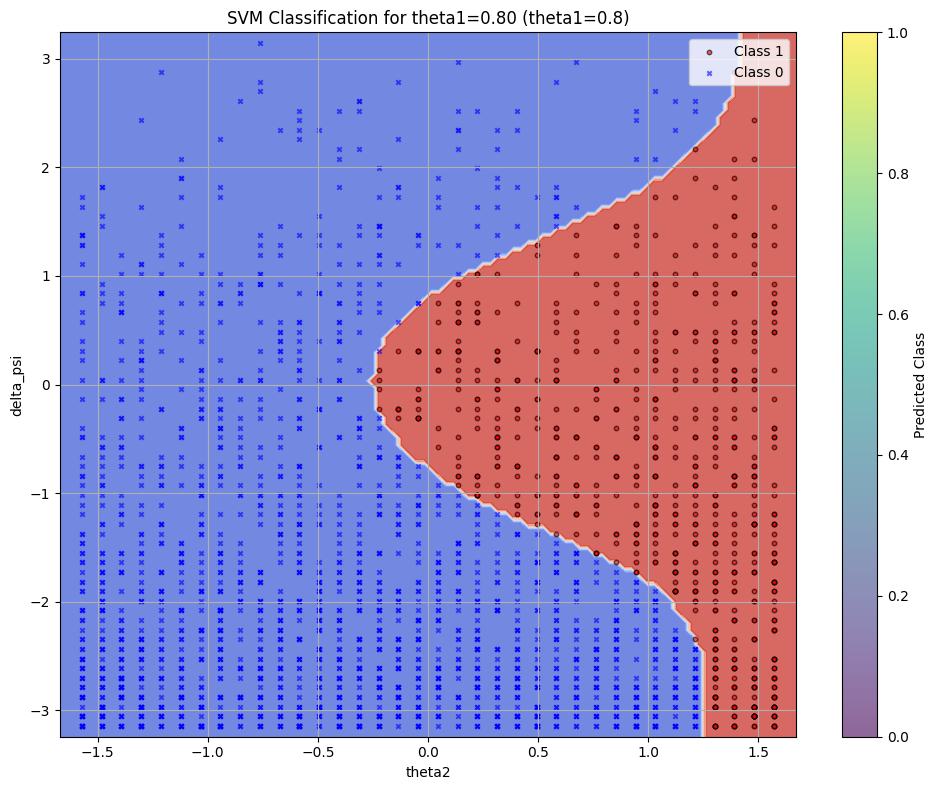


Processing Dataset 3 (theta1 = 1.56):
Dataset theta1=1.56 - Accuracy: 1.0000


C:\Users\LYH\AppData\Local\Temp\ipykernel_2556\912211306.py:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_array[:, 1][data_array[:, 3] == 0], data_array[:, 2][data_array[:, 3] == 0],


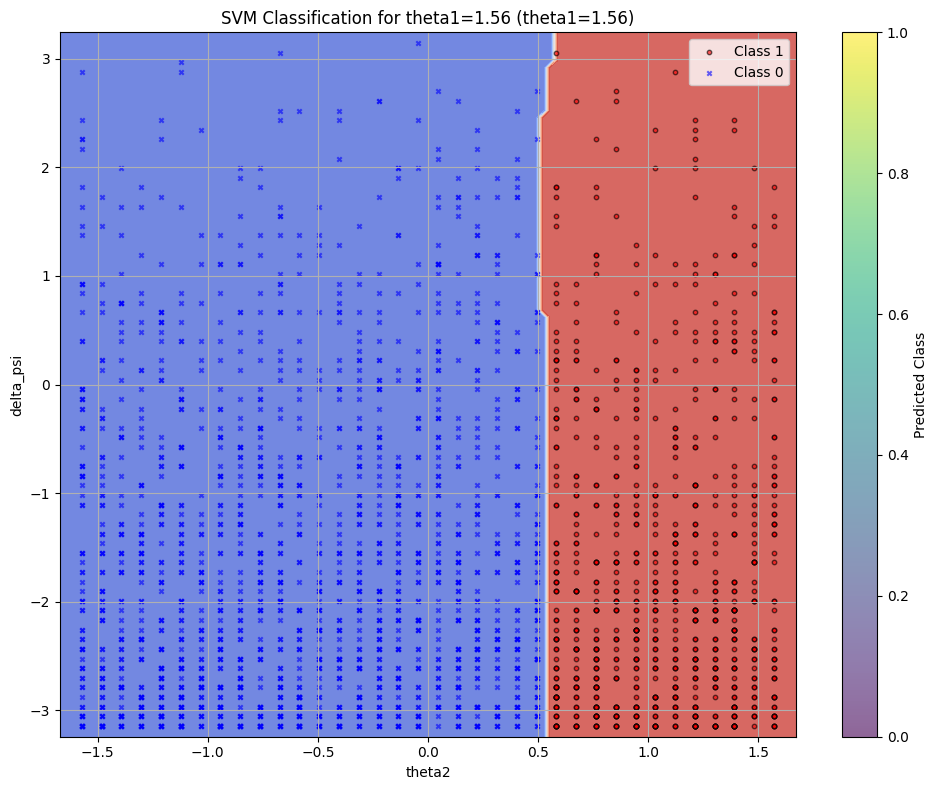

In [5]:
from math import *
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 用于3D绘图，虽然我们主要会用2D投影

import sys
import os
# 假设 Math_calculates.coord_rotations 是一个可用的模块
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# from Math_calculates.coord_rotations import * # 如果coord_rotations没有被使用，可以注释掉

# SVM 相关的库
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import random # 用于打乱数据

# 你的原始函数定义
theta_list = np.linspace(-pi/2, pi/2,  36, endpoint=True)

def one_in_alpha(theta1, theta2, delta_psi, alpha_threshold):
    # 这里假设 coord_rotations 模块中的函数对点和向量的定义与你期望的兼容
    # 如果没有使用，这里直接使用 np.array 和 math 函数
    point_ = np.array([cos(theta1), sin(theta1), 0])
    L_ = np.array([cos(theta2)*cos(delta_psi), sin(theta2), cos(theta2)*sin(delta_psi)])
    cos_alpha = np.dot(point_, L_)
    if cos_alpha >= cos(alpha_threshold):
        in_alpha = True
    else:
        in_alpha = False
    return in_alpha

def in_or_out_alpha(theta, alpha_threshold):
    delta_psi_list = np.linspace(-pi, pi, 72, endpoint=True)
    theta2_list = np.linspace(-pi/2, pi/2, 36, endpoint=True)

    dots_list = []
    for delta_psi in delta_psi_list:
        for theta2 in theta2_list:
            dot_in_alpha = one_in_alpha(theta, theta2, delta_psi, alpha_threshold)
            if dot_in_alpha:
                dots_list.append(np.array([theta, theta2, delta_psi, 1]))
            else:
                dots_list.append(np.array([theta, theta2, delta_psi, 0]))
    return dots_list

# 生成三个数据集
alpha_threshold = pi/3
Dots1 = in_or_out_alpha(0, alpha_threshold)      # theta1 = 0
Dots2 = in_or_out_alpha(0.8, alpha_threshold)    # theta1 = 0.8
Dots3 = in_or_out_alpha(1.56, alpha_threshold)   # theta1 = 1.56 (接近 pi/2)

# 定义一个辅助函数来处理每个数据集的训练和可视化
def train_and_plot_svm(data_list, title_suffix, fig_num):
    # 转换为 NumPy 数组
    data_array = np.array(data_list)
    # 打乱数据
    random.shuffle(data_array) # 直接原地打乱

    X = data_array[:, :3] # 前三维是输入
    y = data_array[:, 3]  # 第四维是输出

    # 数据归一化 (Scaler) 对于 SVM 尤其是 RBF 核很重要
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # # 划分训练集和测试集
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    X_train, y_train = X_scaled, y # 训练集使用全部数据
    X_test, y_test = X_scaled, y   # 测试集也使用全部数据

    # 创建 SVM 分类器 (使用 RBF 核，因为决策边界可能是非线性的)
    # 这里的 C 和 gamma 可以根据需要进行调优
    clf = svm.SVC(kernel='rbf', C=10, gamma='scale', random_state=42) # gamma='scale' 自动设置
    clf.fit(X_train, y_train)

    # 预测并评估模型
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Dataset {title_suffix} - Accuracy: {accuracy:.4f}")

    # 可视化：由于是3D输入，我们将固定 theta1 维度，绘制 theta2 和 delta_psi 上的决策边界
    # 注意：X_scaled 的第一列都是同一个值（因为是针对一个固定 theta1 生成的数据），
    # 所以我们可以直接在 (theta2, delta_psi) 平面上可视化。
    # 但是，我们绘制的是在缩放后的特征空间中的边界。
    
    # 获取原始 theta2 和 delta_psi 的范围
    # 注意：这里需要原始的 theta2 和 delta_psi 范围来创建网格
    # 因为 X_scaled 是归一化后的数据
    theta2_min, theta2_max = data_array[:, 1].min() - 0.1, data_array[:, 1].max() + 0.1
    delta_psi_min, delta_psi_max = data_array[:, 2].min() - 0.1, data_array[:, 2].max() + 0.1

    # 创建网格，这里将固定 theta1 为该数据集的平均值（实际上就是数据集的 theta1 值）
    # 但需要将其归一化
    fixed_theta1_scaled = X_scaled[0, 0] # 取第一个样本的theta1值，所有样本的theta1都一样

    # 为 theta2 和 delta_psi 生成网格
    theta2_grid, delta_psi_grid = np.meshgrid(np.linspace(theta2_min, theta2_max, 100),
                                               np.linspace(delta_psi_min, delta_psi_max, 100))

    # 构建用于预测的网格点，确保它们的 theta1 维度与训练数据一致，且经过缩放
    # 首先，为网格点创建一个 X_grid_raw (未缩放)
    X_grid_raw = np.c_[np.full(theta2_grid.ravel().shape, data_array[0, 0]), # 填充固定的theta1
                       theta2_grid.ravel(),
                       delta_psi_grid.ravel()]

    # 接着，对 X_grid_raw 进行与训练数据相同的缩放处理
    # 注意：这里需要使用 scaler.transform() 而不是 fit_transform()
    X_grid_scaled = scaler.transform(X_grid_raw)

    # 预测网格点上的类别
    Z = clf.predict(X_grid_scaled).reshape(theta2_grid.shape)

    plt.figure(fig_num, figsize=(10, 8))
    plt.contourf(theta2_grid, delta_psi_grid, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # 绘制原始数据点 (使用原始的、未缩放的数据进行绘图，更直观)
    # plt.scatter(data_array[:, 1][data_array[:, 3] == 1], data_array[:, 2][data_array[:, 3] == 1],
    #             c='red', label='Class 1', edgecolors='k', marker='o', s=50)
    # plt.scatter(data_array[:, 1][data_array[:, 3] == 0], data_array[:, 2][data_array[:, 3] == 0],
    #             c='blue', label='Class 0', edgecolors='k', marker='x', s=50)

    # plt.scatter(data_array[:, 1][data_array[:, 3] == 1], data_array[:, 2][data_array[:, 3] == 1],
    #             c='red', label='Class 1', marker='.', s=10, alpha=0.6) # 使用 '.' 标记，可以去掉 edgecolors
    # plt.scatter(data_array[:, 1][data_array[:, 3] == 0], data_array[:, 2][data_array[:, 3] == 0],
    #             c='blue', label='Class 0', marker='.', s=10, alpha=0.6)

    plt.scatter(data_array[:, 1][data_array[:, 3] == 1], data_array[:, 2][data_array[:, 3] == 1],
                c='red', label='Class 1', edgecolors='k', marker='o', s=10, alpha=0.6) # 减小 s，增加 alpha
    plt.scatter(data_array[:, 1][data_array[:, 3] == 0], data_array[:, 2][data_array[:, 3] == 0],
                c='blue', label='Class 0', edgecolors='k', marker='x', s=10, alpha=0.6) # 减小 s，增加 alpha

    # 绘制支持向量 (需要在缩放后的空间中获取支持向量，然后逆变换或直接用颜色表示)
    # 为了简化，这里不绘制支持向量，因为逆变换 scaler 稍微复杂，且在 2D 投影中可能不清晰

    plt.xlabel('theta2')
    plt.ylabel('delta_psi')
    plt.title(f'SVM Classification for theta1={data_array[0,0]:.2f} ({title_suffix})')
    plt.legend()
    plt.grid(True)
    plt.colorbar(label='Predicted Class')
    
    # 生成图片
    plt.tight_layout()
    plt.show()

# 分别处理三个数据集
print("Processing Dataset 1 (theta1 = 0):")
train_and_plot_svm(Dots1, "theta1=0", 1)

print("\nProcessing Dataset 2 (theta1 = 0.8):")
train_and_plot_svm(Dots2, "theta1=0.8", 2)

print("\nProcessing Dataset 3 (theta1 = 1.56):")
train_and_plot_svm(Dots3, "theta1=1.56", 3)